In [1]:
versioninfo()

Julia Version 1.11.5
Commit 760b2e5b739 (2025-04-14 06:53 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 12 × 12th Gen Intel(R) Core(TM) i5-1235U
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, alderlake)
Threads: 4 default, 0 interactive, 2 GC (on 12 virtual cores)
Environment:
  JULIA_CONDAPKG_BACKEND = System
  JULIA_PYTHONCALL_EXE = /home/motchy/miniforge3/bin/python
  JULIA_CONDAPKG_EXE = /home/motchy/miniforge3/bin/conda
  JULIA_NUM_THREADS = 4


In [2]:
using DSP
using Plots

## Parameters and Test Data

In [1]:
module Glob
    P=5; Q=16; N=P*Q;
    x = rand(Float64, N) .- 0.5 + im*(rand(Float64, N) .- 0.5);
end

Main.Glob

## View Test Data

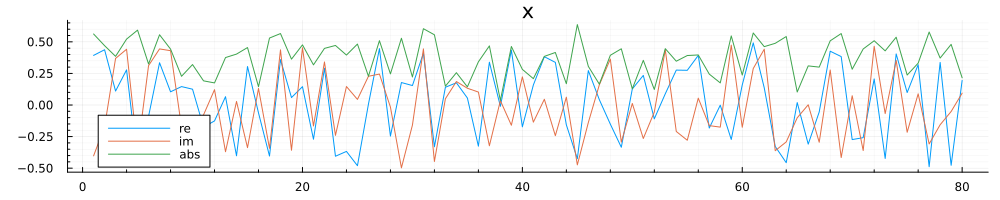

In [3]:
let
    plt1 = plot(real(Glob.x), label="re", xlabel="n", ylabel="val", minorgrid=true, title="x", size=(1000, 200))
    plt1 = plot!(imag(Glob.x), label="im"); plt1 = plot!(abs.(Glob.x), label="abs")
end

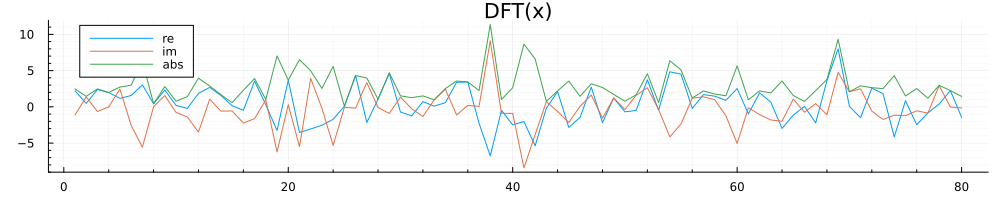

In [4]:
gX_truth = DSP.fft(Glob.x);
let
    plt1 = plot(real(gX_truth), label="re", xlabel="k", ylabel="val", minorgrid=true, title="DFT(x)", size=(1000, 200))
    plt1 = plot!(imag(gX_truth), label="im"); plt1 = plot!(abs.(gX_truth), label="abs")
end

## Calculate DFT with length factorization

In [5]:
let
    # sub FFT
    mat_X_tld_1 = Matrix{ComplexF64}(undef, Glob.P, Glob.Q)
    for n_0 = 0:Glob.P-1
        x_1 = view(Glob.x, (1+n_0):Glob.P:Glob.N)
        X_1 = DSP.fft(x_1)
        X_tld_1 = [exp(-im*2*pi*k_0*n_0/Glob.N) for k_0=0:Glob.Q-1] .* X_1
        mat_X_tld_1[1+n_0, :] = X_tld_1
    end

    # top FFT
    mat_X = Matrix{ComplexF64}(undef, Glob.Q, Glob.P)
    for k_0 = 0:Glob.Q-1
        mat_X[1+k_0, :] = DSP.fft(mat_X_tld_1[:, 1+k_0]) # We use FFT routine for simplicity, but when P is a prime number, FFT has no advantage compared to direct DFT.
    end
    global gX_fact = reshape(mat_X, Glob.N)
end;

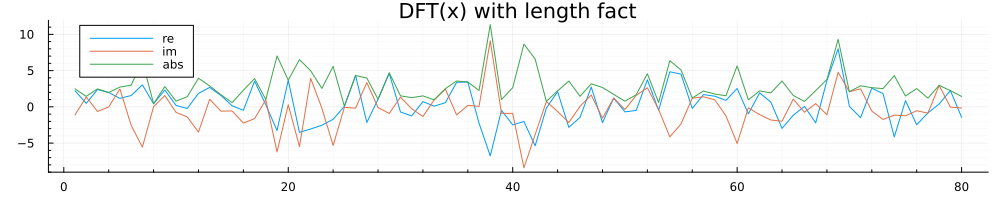

In [6]:
let
    plt1 = plot(real(gX_fact), label="re", xlabel="k", ylabel="val", minorgrid=true, title="DFT(x) with length fact", size=(1000, 200))
    plt1 = plot!(imag(gX_fact), label="im"); plt1 = plot!(abs.(gX_fact), label="abs")
end

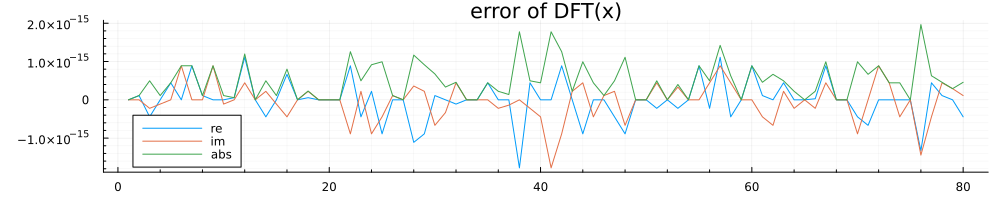

In [7]:
let
    X_err = gX_fact - gX_truth
    plt1 = plot(real(X_err), label="re", xlabel="k", ylabel="val", minorgrid=true, title="error of DFT(x)", size=(1000, 200))
    plt1 = plot!(imag(X_err), label="im"); plt1 = plot!(abs.(X_err), label="abs")
end

## Playground

In [24]:
Glob.x[1:Glob.P:Glob.N]

64-element Vector{ComplexF64}:
   0.11640449938334674 - 0.4603408966623075im
   0.05451756998827895 + 0.09301539462384534im
   0.06462086351055851 + 0.24719381560264864im
  -0.35720684786606527 + 0.4393267275056617im
   -0.1028190290689811 + 0.15559285573535953im
   0.16718021520538284 + 0.4105376185018186im
  -0.07001284119982998 + 0.4255078143206963im
  -0.23845553529565255 + 0.4231791907345216im
   -0.3917782533151283 - 0.4012340974288261im
  -0.46232938825550607 - 0.081880738069676im
                       ⋮
   0.43313044759387287 - 0.13339621976195137im
   -0.1464426001784782 - 0.33838537354488685im
  -0.04041383690126643 - 0.3208049504129773im
   -0.1137293448622817 + 0.3094322001919201im
   -0.1439824076198013 + 0.3216623453590318im
   -0.3738769758821954 + 0.04369399019732556im
    0.4055025082140207 - 0.020763510783303407im
    0.3964152009155335 + 0.3442041055485746im
 -0.011987910803060053 + 0.4614781967827638im